# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [2]:
orders = pd.read_csv('./Orders.csv')
temp = pd.read_csv('./Temp_States.csv')

#### Print `temp`

In [3]:
print (temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [4]:
print (temp.dtypes)

#Tenemos una talaba de temperaturas segun estado y ciudad

City            object
State           object
Temperature    float64
dtype: object


#### Selecciona las filas en las que el estado es New York

In [5]:
new_york = temp[temp['State']=='New York']
print (new_york)

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [6]:
ny_temp = new_york['Temperature'].mean()
print (ny_temp)

10.74074074074074


#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [7]:
temp_more_15g = temp[temp['Temperature'] >= 15]
print (temp_more_15g)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [8]:
cities_temp_more_15g = temp[temp['Temperature'] > 15][['City','Temperature']]
print(cities_temp_more_15g)

       City  Temperature
0       NYC    19.444444
3  Hartford    17.222222
5    Treton    22.222222
6    Newark    20.000000


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [9]:
cities_temp_between_15_and_20g = temp[(temp['Temperature'] > 15)&(temp['Temperature']<=20)][['City','Temperature']]
print(cities_temp_between_15_and_20g)


       City  Temperature
0       NYC    19.444444
3  Hartford    17.222222
6    Newark    20.000000


In [10]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [11]:
temperatura_estadisticas = temp.groupby('State')['Temperature'].agg(['mean', 'std']).reset_index()
print(temperatura_estadisticas)

         State       mean       std
0  Connecticut  15.833333  1.964186
1   New Jersey  21.111111  1.571348
2     New York  10.740741  8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [12]:
employee = pd.read_csv('./Employee.csv')
print(employee)

     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70


#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [13]:
print(employee.dtypes)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

Text(0, 0.5, 'Frecuencia')

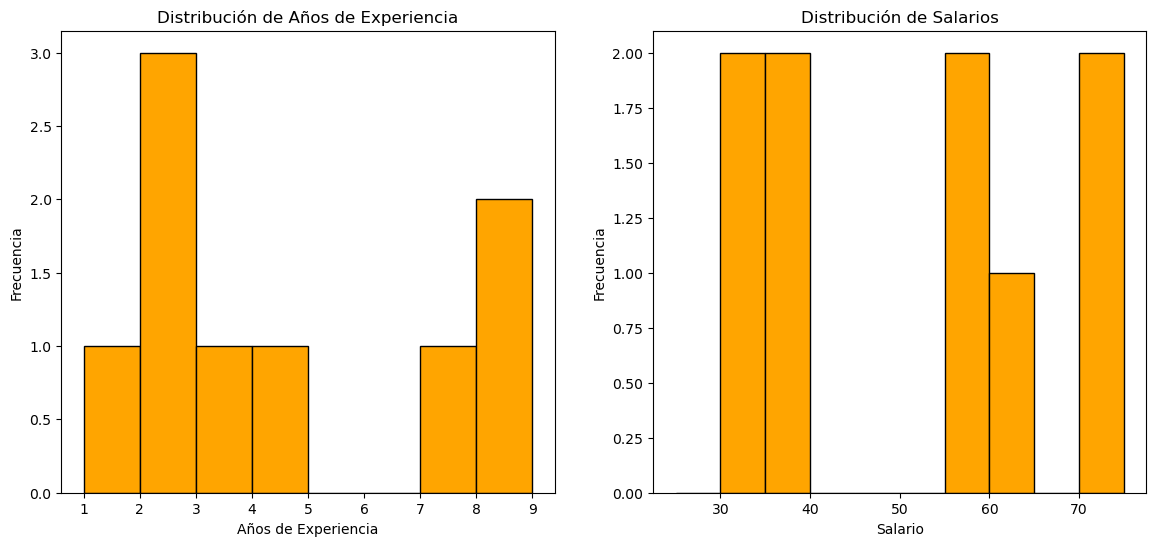

In [14]:
plt.figure(figsize=(14, 6))

# Histograma de años de experiencia
plt.subplot(1, 2, 1)
plt.hist(employee['Years'], bins=range(1, 10), edgecolor='black',color='orange', alpha=1)
plt.title('Distribución de Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Frecuencia')

# Histograma de salarios
plt.subplot(1, 2, 2)
plt.hist(employee['Salary'], bins=range(25, 80, 5),  edgecolor='black',color='orange',alpha=1)
plt.title('Distribución de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')

#### ¿Cuál es el salario medio en esta empresa?

In [15]:
salary_mean = employee['Salary'].mean()
print(f'salary mean is :{salary_mean}')

salary mean is :48.888888888888886


#### ¿Cuál es el salario más alto?

In [16]:
salary_max = employee['Salary'].max()
print(f'the salary max is: {salary_max}')

the salary max is: 70


#### ¿Cuál es el salario más bajo?

In [17]:
salary_min = employee['Salary'].min()
print(f'the salary max is: {salary_min}')

the salary max is: 30


#### ¿Quiénes son los empleados con el salario más bajo?

In [18]:
employees_with_min_salary = employee[employee['Salary'] == salary_min]
print(employees_with_min_salary)# YOUR CODE HERE

    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [19]:
employee_david = employee[employee['Name'] == "David"]
print(employee_david)


    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### ¿Podría dar sólo el sueldo de David?

In [20]:
employee_david_salary = employee[employee['Name'] == "David"][['Name','Salary']]
print(employee_david_salary)

    Name  Salary
2  David      30


#### Printea todas las líneas en las que el cargo es asociado

In [21]:
employee_associate = employee[employee['Title'] == "associate"]
print(employee_associate)

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [22]:
print(employee.head(3))   

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [23]:
print(employee[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [24]:
filtered_employees = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

print(filtered_employees)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [25]:
average_salary = employee.groupby('Years')['Salary'].mean()
print(average_salary)

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


#### ¿Cuál es el salario medio por título?

In [26]:
average_salary_x_title = employee.groupby('Title')['Salary'].mean()
print(average_salary_x_title)


Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

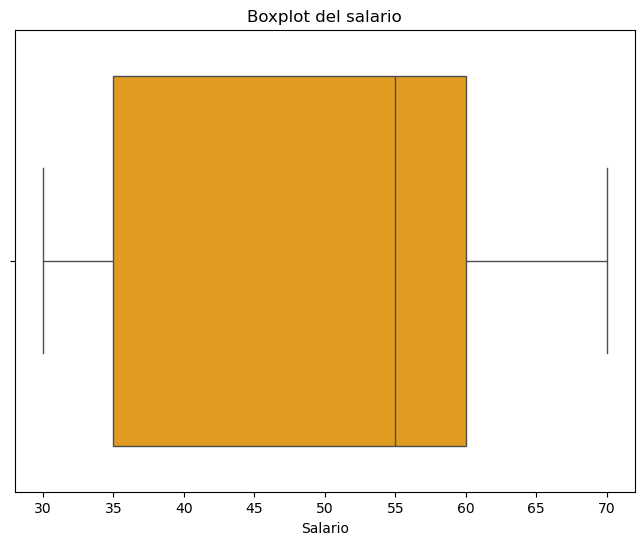

Primer cuartil (Q1): 35.0
Tercer cuartil (Q3): 60.0
el q1 y q3 determinan los limites salariales tanto al mínimo como al máximo


In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=employee, x='Salary',color="orange")
plt.title("Boxplot del salario")
plt.xlabel("Salario")
plt.show()
q1 = employee['Salary'].quantile(0.25)
q3 = employee['Salary'].quantile(0.75)

print(f"Primer cuartil (Q1): {q1}")
print(f"Tercer cuartil (Q3): {q3}")

print ("el q1 y q3 determinan los limites salariales tanto al mínimo como al máximo")

#### ¿Es diferente el salario medio por género?

In [28]:
salary_x_gender = employee.groupby('Gender')['Salary'].mean()
print(salary_x_gender)
print("El salario medio de los hombres es mayor al de las mujeres")

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64
El salario medio de los hombres es mayor al de las mujeres


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [29]:
numeric_df = employee.select_dtypes(include='number')
stats_by_department = numeric_df.groupby(employee['Department']).agg(['min', 'mean', 'max'])
print(stats_by_department)



           Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [30]:
# your answer here


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [31]:
orders = pd.read_csv('Orders.csv')
print(orders.head())


   Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0           0     536365    85123A  2010     12    3     8   
1           1     536365     71053  2010     12    3     8   
2           2     536365    84406B  2010     12    3     8   
3           3     536365    84029G  2010     12    3     8   
4           4     536365    84029E  2010     12    3     8   

                           Description  Quantity          InvoiceDate  \
0   white hanging heart t-light holder         6  2010-12-01 08:26:00   
1                  white metal lantern         6  2010-12-01 08:26:00   
2       cream cupid hearts coat hanger         8  2010-12-01 08:26:00   
3  knitted union flag hot water bottle         6  2010-12-01 08:26:00   
4       red woolly hottie white heart.         6  2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  amount_spent  
0       2.55       17850  United Kingdom         15.30  
1       3.39       17850  United Kingdom         20.34  
2       2.75     

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [32]:
print(orders.dtypes)

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object


In [33]:
print(orders.describe(include='all')) 


           Unnamed: 0      InvoiceNo StockCode           year          month  \
count   397924.000000  397924.000000    397924  397924.000000  397924.000000   
unique            NaN            NaN      3665            NaN            NaN   
top               NaN            NaN    85123A            NaN            NaN   
freq              NaN            NaN      2035            NaN            NaN   
mean    278465.221859  560617.126645       NaN    2010.934259       7.612537   
std     152771.368303   13106.167695       NaN       0.247829       3.416527   
min          0.000000  536365.000000       NaN    2010.000000       1.000000   
25%     148333.750000  549234.000000       NaN    2011.000000       5.000000   
50%     284907.500000  561893.000000       NaN    2011.000000       8.000000   
75%     410079.250000  572090.000000       NaN    2011.000000      11.000000   
max     541908.000000  581587.000000       NaN    2011.000000      12.000000   

                  day           hour   

In [34]:
price_mean = orders['amount_spent'].mean()
print(price_mean)

22.394748504739596


#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [35]:
price_mean = orders['amount_spent'].min()
print("El precio de compra más bajo es:", price_mean)


El precio de compra más bajo es: 0.0


In [36]:
price_max = orders['amount_spent'].max()
print("El precio de compra más alto es:", price_max)


El precio de compra más alto es: 168469.6


#### Seleccione todos los clientes que tenemos en España

In [37]:
clients_spain = orders[orders['Country'] == 'Spain']
print(clients_spain)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
...            ...        ...       ...   ...    ...  ...   ...   
394733      535271     581193     23291  2011     12    3    17   
394734      535272     581193    85232D  2011     12    3    17   
394735      535273     581193     22721  2011     12    3    17   
394736      535274     581193     23241  2011     12    3    17   
394737      535275     581193     23247  2011     12    3    17   

                          Description  Quantity          InvoiceDate  \
4250          lunch bag suki  design         70  2010-12-03 12:20:00   
4251          lunch bag pink polkadot       100  20

#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [38]:
count_client = orders['Country'].value_counts()
number_clients_spain = count_client.get('Spain', 0) 
print("Número de clientes en España:", number_clients_spain)

Número de clientes en España: 2485


#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [39]:
clients_more_50 = orders[orders['Quantity'] > 50]
print(clients_more_50)


        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
46              46     536371     22086  2010     12    3     9   
83              83     536376     21733  2010     12    3     9   
96              96     536378     21212  2010     12    3     9   
102            102     536378    85071B  2010     12    3     9   
174            176     536386    85099C  2010     12    3     9   
...            ...        ...       ...   ...    ...  ...   ...   
397720      541702     581566     23404  2011     12    5    11   
397721      541703     581567     21417  2011     12    5    11   
397729      541711     581567     21326  2011     12    5    11   
397761      541746     581571     23167  2011     12    5    12   
397882      541867     581584     20832  2011     12    5    12   

                               Description  Quantity          InvoiceDate  \
46         paper chain kit 50's christmas         80  2010-12-01 09:00:00   
83        red hanging heart t-light holde

#### Selecciona pedidos de España superiores a 50 artículos

In [40]:
orders_more_50= orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]
print(orders_more_50)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
32454        52416     540785    84997B  2011      1    2    11   
32455        52417     540785    84997D  2011      1    2    11   
32456        52418     540785    84997C  2011      1    2    11   
32457        52419     540785    84997A  2011      1    2    11   
91155       136767     547972     22383  2011      3    1    16   
91156       136768     547972     22384  2011      3    1    16   
91159       136771     547972     20728  2011      3    1    16   
174442      248797     558871     22384  2011      7    1    13   
174443      248798     558871     20727  2011      7    1    1

#### Seleccionar todos los pedidos gratuitos

In [41]:
free_orders = orders[orders['amount_spent'] == 0]
print(free_orders)


        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
6914          9302     537197     22841  2010     12    7    14   
22539        33576     539263     22580  2010     12    4    14   
25379        40089     539722     22423  2010     12    2    13   
29080        47068     540372     22090  2011      1    4    16   
29082        47070     540372     22553  2011      1    4    16   
34494        56674     541109     22168  2011      1    4    15   
53788        86789     543599    84535B  2011      2    4    13   
85671       130188     547417     22062  2011      3    3    10   
92875       139453     548318     22055  2011      3    3    12   
97430       145208     548871     22162  2011      4    1    14   
107192      157042     550188     22636  2011      4    4    18   
128641      187613     553000     47566  2011      5    4    15   
137127      198383     554037     22619  2011      5    5    14   
194648      279324     561284     22167  2011      7    2    1

#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [42]:
orders_lunch_bag = orders[orders['Description'].str.contains('lunch bag', case=False, na=False)]
print(orders_lunch_bag)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172     lunch bag dolly girl desi

#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [43]:
orders_lunch_bag_2011 = orders[(orders['year'] == 2011) & (orders['Description'].str.contains('lunch bag', case=False, na=False))]
print(orders_lunch_bag_2011)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
26340        42678     540015     20725  2011      1    2    11   
26341        42679     540015     20726  2011      1    2    11   
26512        42851     540023     22382  2011      1    2    12   
26513        42852     540023     20726  2011      1    2    12   
26860        43616     540098     22384  2011      1    2    15   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
26340       lunch bag red retrospot        10  2011-01-04 11:40:00       1.65   
26341            lunch bag woodla

#### Muestra la distribución de frecuencias del importe gastado en España.

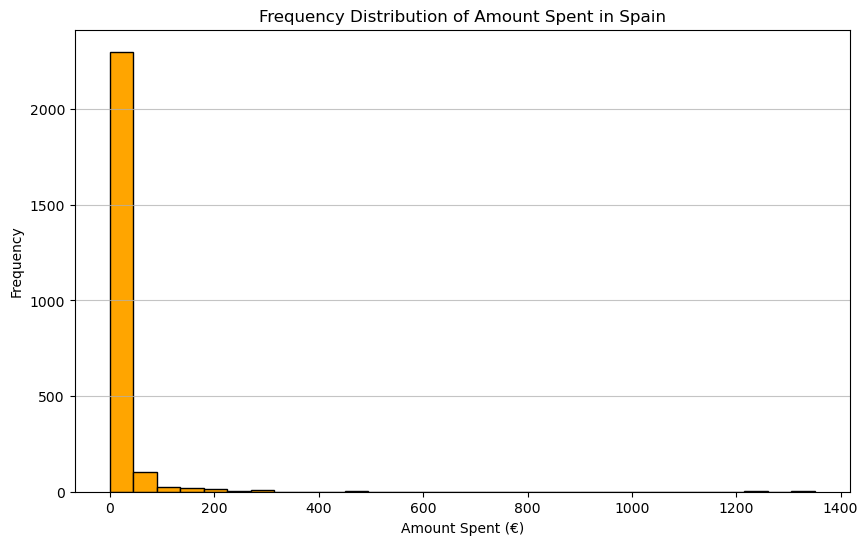

In [44]:
spain_orders = orders[orders['Country'] == 'Spain']

plt.figure(figsize=(10, 6))
plt.hist(spain_orders['amount_spent'], bins=30, edgecolor='black',color='orange', alpha=1)
plt.title('Frequency Distribution of Amount Spent in Spain')
plt.xlabel('Amount Spent (€)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


#### Seleccione todos los pedidos realizados en el mes de agosto

In [45]:
orders['month'] = orders['month'].astype(int)
august_orders = orders[orders['month'] == 8]
print(august_orders.head())



        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
199475      285421     561904     22075  2011      8    1     8   
199476      285422     561904    85049E  2011      8    1     8   
199477      285423     561905     21385  2011      8    1     9   
199478      285424     561905    84970L  2011      8    1     9   
199479      285425     561905    84970S  2011      8    1     9   

                              Description  Quantity          InvoiceDate  \
199475       6 ribbons elegant christmas         96  2011-08-01 08:30:00   
199476          scandinavian reds ribbons       156  2011-08-01 08:30:00   
199477    ivory hanging decoration  heart        24  2011-08-01 09:31:00   
199478   single heart zinc t-light holder        12  2011-08-01 09:31:00   
199479  hanging heart zinc t-light holder        12  2011-08-01 09:31:00   

        UnitPrice  CustomerID         Country  amount_spent  
199475       1.45       17941  United Kingdom        139.20  
199476       1.0

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [46]:
august_orders = orders[orders['month'] == 8]
orders_by_country_august = august_orders['Country'].value_counts()
print(orders_by_country_august)


Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64


#### ¿Cuál es el gasto medio por país?

In [47]:
mean_x__country = orders.groupby('Country')['amount_spent'].mean()
print(mean_x__country)

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### ¿Cuál es el artículo más caro?

In [48]:
most_expensive_item_index = orders['UnitPrice'].idxmax()
most_expensive_item = orders.loc[most_expensive_item_index]
print(most_expensive_item)

Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object


#### ¿Cuál fue la cantidad media gastada al año?

In [49]:
total_spent_per_year = orders.groupby('year')['amount_spent'].sum()
average_spent_per_year = total_spent_per_year.mean()
print("La cantidad media gastada al año es:", average_spent_per_year)

La cantidad media gastada al año es: 4455703.9520000005
